In [62]:
import seaborn as sns
import pandas as pd

In [63]:
# Mount Google Drive (to save the downloaded files)
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [64]:
!cp "/gdrive/My Drive/MoL/NLP/Practical 2/PTDeep CBOW/ptdeepcbow_data.csv" .

In [65]:
!cp "/gdrive/My Drive/MoL/NLP/Practical 2/LSTM/lstm_data.csv" .

In [66]:
!cp "/gdrive/My Drive/MoL/NLP/Practical 2/moresents tree LSTM/moresentstreelstm_data.csv" .

In [67]:
!cp "/gdrive/My Drive/MoL/NLP/Practical 2/total_data.csv" .

In [68]:
!cp "/gdrive/My Drive/MoL/NLP/Practical 2/ptcbow_lstm_data_finetuned.csv" .

In [69]:
df_bow = pd.read_csv('ptdeepcbow_data.csv')
df_lstm_finetuned = pd.read_csv("ptcbow_lstm_data_finetuned.csv")
df_lstm_pbow_finetuned = pd.read_csv("ptcbow_lstm_data_finetuned.csv")
df_lstm_finetuned = df_lstm_finetuned[(df_lstm_finetuned.model == "LSTM") | (df_lstm_finetuned.model == "LSTM-finetuned")]
df_temp = pd.concat([df_bow, df_lstm_finetuned], axis=0)
df = pd.read_csv('total_data.csv')

total_df = pd.concat([df_temp, df], axis=0)

df_last2_dropped = total_df[(total_df.model != "More sents Tree LSTM") & (total_df.model != "Child Sum Tree LSTM") & (total_df.model != "LSTM-finetuned")]

df_not_all_len = df_last2_dropped[df_last2_dropped.length !="all lengths"]
models = df_last2_dropped["model"]
print(models)

0           bow
1           bow
2           bow
3           bow
4           bow
        ...    
70    Tree LSTM
71    Tree LSTM
72    Tree LSTM
73    Tree LSTM
74    Tree LSTM
Name: model, Length: 150, dtype: object


In [70]:
print(df_lstm_finetuned)

         length  accuracy  seed           model
0          0-13  0.470499     7            LSTM
1         14-20  0.466882     7            LSTM
2         21-30  0.416296     7            LSTM
3         31-50  0.427451     7            LSTM
4   all lengths  0.447964     7            LSTM
5          0-13  0.447806    21            LSTM
6         14-20  0.441034    21            LSTM
7         21-30  0.402963    21            LSTM
8         31-50  0.427451    21            LSTM
9   all lengths  0.429864    21            LSTM
10         0-13  0.476551    42            LSTM
11        14-20  0.437803    42            LSTM
12        21-30  0.411852    42            LSTM
13        31-50  0.423529    42            LSTM
14  all lengths  0.439819    42            LSTM
30         0-13  0.425113     7  LSTM-finetuned
31        14-20  0.447496     7  LSTM-finetuned
32        21-30  0.422222     7  LSTM-finetuned
33        31-50  0.415686     7  LSTM-finetuned
34  all lengths  0.429412     7  LSTM-fi

In [71]:
df_all_len = total_df[total_df.length =="all lengths"]

In [72]:
df_all_len2dropped = df_last2_dropped[df_last2_dropped.length =="all lengths"]

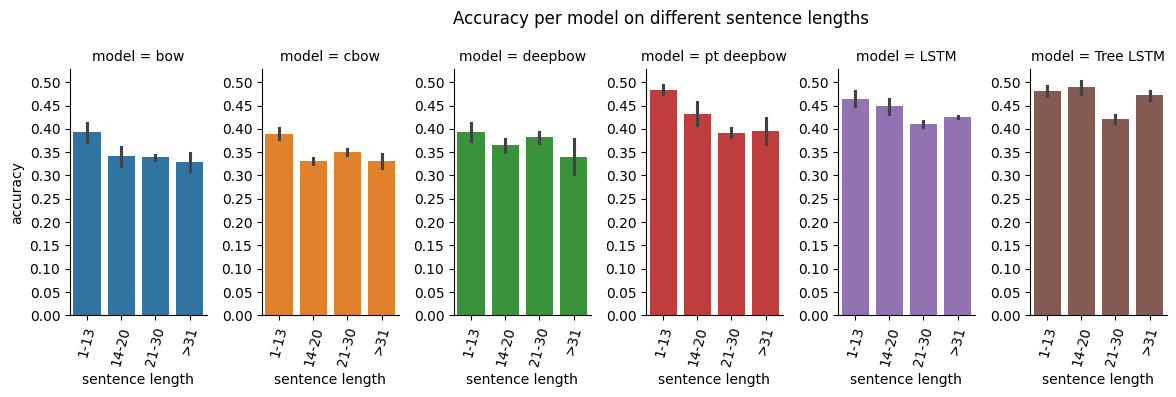

In [73]:
g = sns.catplot(
    df_not_all_len, kind="bar",
    x="length", y="accuracy", col="model",
    hue = "model",
    height=4, aspect=.5,
    errorbar="sd",
)
for axis in g.axes.flat:
    axis.tick_params(labelleft=True)
    axis.set_yticks([0.0, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50])
g.fig.suptitle("Accuracy per model on different sentence lengths")
g.set_xlabels("sentence length")
g.set_xticklabels(["1-13", "14-20", "21-30", ">31" ], rotation=75)
g._legend.remove()
g.tight_layout()


In [74]:
print(df_all_len2dropped)

         length  accuracy  seed       model
4   all lengths  0.353846     7         bow
9   all lengths  0.370136    21         bow
14  all lengths  0.339367    42         bow
19  all lengths  0.344796     7        cbow
24  all lengths  0.359276    21        cbow
29  all lengths  0.359276    42        cbow
34  all lengths  0.362896     7     deepbow
39  all lengths  0.392760    21     deepbow
44  all lengths  0.371493    42     deepbow
49  all lengths  0.429864     7  pt deepbow
54  all lengths  0.422624    21  pt deepbow
59  all lengths  0.440724    42  pt deepbow
4   all lengths  0.447964     7        LSTM
9   all lengths  0.429864    21        LSTM
14  all lengths  0.439819    42        LSTM
4   all lengths  0.353846     7         bow
9   all lengths  0.370136    21         bow
14  all lengths  0.339367    42         bow
19  all lengths  0.344796     7        cbow
24  all lengths  0.359276    21        cbow
29  all lengths  0.359276    42        cbow
34  all lengths  0.362896     7 

<ipython-input-75-982fb57de8bf>:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  p.set_xticklabels(["bow", "cbow", "deepcbow", "pt \n deepcbow", "LSTM", "Tree LSTM"], rotation=75, fontsize=12)


[Text(0, 0, 'bow'),
 Text(1, 0, 'cbow'),
 Text(2, 0, 'deepcbow'),
 Text(3, 0, 'pt \n deepcbow'),
 Text(4, 0, 'LSTM'),
 Text(5, 0, 'Tree LSTM')]

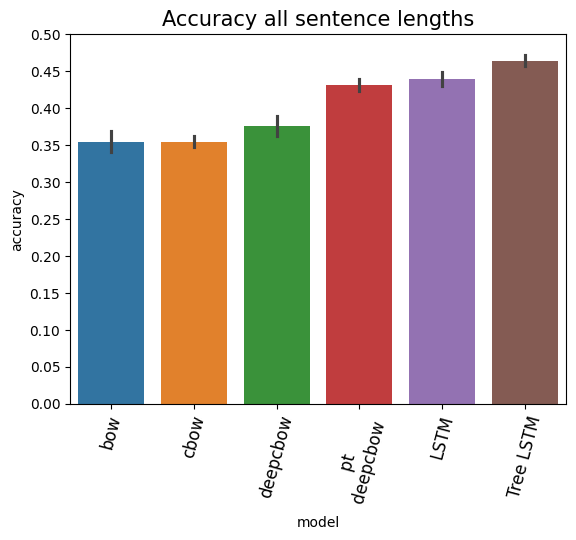

In [75]:
p = sns.barplot(df_all_len2dropped, x="model", y="accuracy", hue="model", errorbar="sd")
p.set_title("Accuracy all sentence lengths", fontsize=15)
p.set_yticks([0.0, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50])
p.set_xticklabels(["bow", "cbow", "deepcbow", "pt \n deepcbow", "LSTM", "Tree LSTM"], rotation=75, fontsize=12)

<ipython-input-76-ab2bc17752dd>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.set_xticklabels(["Regular \n Tree LSTM", "Child Sum \n Tree LSTM", "fine-grained \n Tree LSTM"], rotation=75, fontsize=12)


[Text(0, 0, 'Regular \n Tree LSTM'),
 Text(1, 0, 'Child Sum \n Tree LSTM'),
 Text(2, 0, 'fine-grained \n Tree LSTM')]

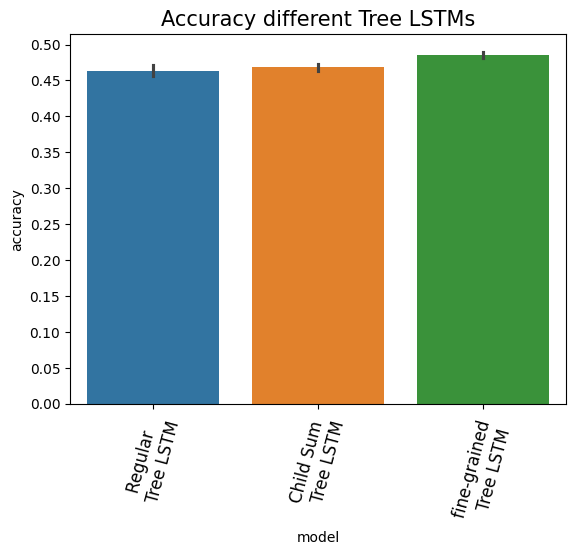

In [76]:
df_allTrees = df_all_len[(df_all_len.model == "More sents Tree LSTM") | (df_all_len.model == "Tree LSTM") | (df_all_len.model == "Child Sum Tree LSTM")]

plt = sns.barplot(df_allTrees, x="model", y="accuracy", hue="model", errorbar="sd",)
plt.set_title("Accuracy different Tree LSTMs", fontsize=15)
plt.set_yticks([0.0, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50])
plt.set_xticklabels(["Regular \n Tree LSTM", "Child Sum \n Tree LSTM", "fine-grained \n Tree LSTM"], rotation=75, fontsize=12)

<ipython-input-77-ab27d145f2b8>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.set_xticklabels(["Regular \n Tree LSTM", "fine-grained \n Tree LSTM"])


[Text(0, 0, 'Regular \n Tree LSTM'), Text(1, 0, 'fine-grained \n Tree LSTM')]

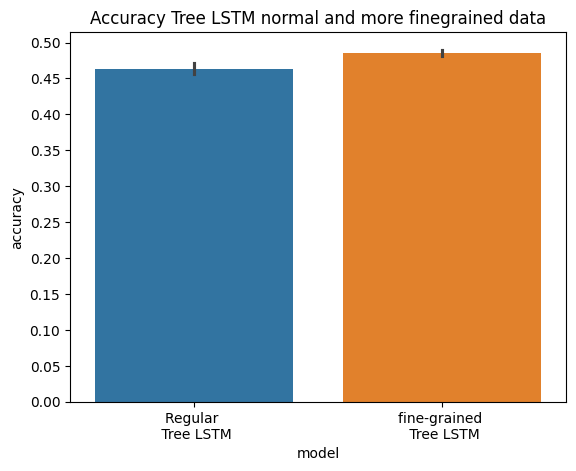

In [77]:
df_moresents_and_normal = df_all_len[(df_all_len.model == "More sents Tree LSTM") | (df_all_len.model == "Tree LSTM")]

plt = sns.barplot(df_moresents_and_normal, x="model", y="accuracy", hue="model", errorbar="sd")
plt.set_title("Accuracy Tree LSTM normal and more finegrained data")
plt.set_yticks([0.0, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50])
plt.set_xticklabels(["Regular \n Tree LSTM", "fine-grained \n Tree LSTM"])

<ipython-input-78-2e5e7cb42126>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.set_xticklabels(["Regular \n Tree LSTM", "fine-grained \n Tree LSTM"])


[Text(0, 0, 'Regular \n Tree LSTM'), Text(1, 0, 'fine-grained \n Tree LSTM')]

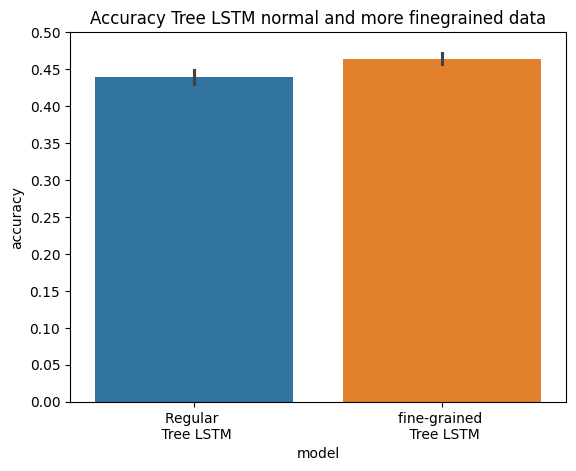

In [78]:
df_moresents_and_normal = df_all_len[(df_all_len.model == "LSTM") | (df_all_len.model == "Tree LSTM")]

plt = sns.barplot(df_moresents_and_normal, x="model", y="accuracy", hue="model", errorbar="sd")
plt.set_title("Accuracy Tree LSTM normal and more finegrained data")
plt.set_yticks([0.0, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50])
plt.set_xticklabels(["Regular \n Tree LSTM", "fine-grained \n Tree LSTM"])

In [79]:
df_TreeLSTM = df_all_len[(df_all_len.model == "Tree LSTM")]

print((df_TreeLSTM["accuracy"]).mean())

0.46365007541478126


In [93]:
df_moresents = df_all_len[(df_all_len.model == "More sents Tree LSTM")]

print((df_moresents["accuracy"]).mean())
print((df_moresents["accuracy"]).std())

0.4861236802413273
0.0042043317842431985


In [92]:
df_childsum = df_all_len[df_all_len.model == "Child Sum Tree LSTM"]

print((df_childsum["accuracy"]).mean())
print((df_childsum["accuracy"]).std())

0.46832579185520357
0.0047241205922671685


In [95]:
df_deep = df_all_len[df_all_len["model"] == "deepbow"]

print(df_deep)
print((df_deep["accuracy"]).mean())
print((df_deep["accuracy"]).std())

         length  accuracy  seed    model
34  all lengths  0.362896     7  deepbow
39  all lengths  0.392760    21  deepbow
44  all lengths  0.371493    42  deepbow
34  all lengths  0.362896     7  deepbow
39  all lengths  0.392760    21  deepbow
44  all lengths  0.371493    42  deepbow
0.3757164404223228
0.013750495181723736


In [94]:
df_pt_deep = df_all_len[df_all_len["model"] == "pt deepbow"]

print(df_pt_deep)
print((df_pt_deep["accuracy"]).mean())
print((df_pt_deep["accuracy"]).std())

         length  accuracy  seed       model
49  all lengths  0.429864     7  pt deepbow
54  all lengths  0.422624    21  pt deepbow
59  all lengths  0.440724    42  pt deepbow
49  all lengths  0.429864     7  pt deepbow
54  all lengths  0.422624    21  pt deepbow
59  all lengths  0.440724    42  pt deepbow
0.4310708898944193
0.008148147458767623


In [83]:
df_bows_all_lens = df_all_len2dropped[(df_all_len2dropped["model"] != "LSTM") & (df_all_len2dropped["model"] != "Tree LSTM")]
print(set(df_bows_all_lens["model"]))

print((df_bows_all_lens["accuracy"]).mean())

{'bow', 'pt deepbow', 'deepbow', 'cbow'}
0.37892156862745097


In [84]:
df_lstms_all_lens = df_all_len2dropped[(df_all_len2dropped["model"] == "LSTM") | (df_all_len2dropped["model"] == "Tree LSTM")]
print(set(df_lstms_all_lens["model"]))

print((df_lstms_all_lens["accuracy"]).mean())

{'LSTM', 'Tree LSTM'}
0.45143288084464556


In [85]:
df_LSTM = df_all_len[(df_all_len["model"] == "LSTM")]
print(set(df_LSTM["model"]))
print((df_LSTM["accuracy"]).mean())

{'LSTM'}
0.4392156862745098


In [86]:
df_TreeLSTM = df_all_len[df_all_len["model"] == "Tree LSTM"]
print(set(df_TreeLSTM["model"]))

print((df_TreeLSTM["accuracy"]).mean())

{'Tree LSTM'}
0.46365007541478126


In [87]:
df_bows_na_lens = total_df[(total_df["model"] != "LSTM") & (total_df["model"] != "Tree LSTM") & (total_df["model"] != "More sents Tree LSTM") & (total_df["model"] != "Child Sum Tree LSTM")]
df_bows_na_lens = df_bows_na_lens[(df_bows_na_lens["model"] !="LSTM-finetuned")]
print(set(df_bows_na_lens["model"]))
df_bows_na_lens = df_bows_na_lens[(df_bows_na_lens["length"] != "all lengths")]

df_bows_na_lens["model"] = "BoWs"

df_lstm_na_lens = total_df[(total_df["model"] == "LSTM") | (total_df["model"] == "Tree LSTM")]
df_lstm_na_lens = df_lstm_na_lens[(df_lstm_na_lens["length"] != "all lengths")]
df_lstm_na_lens["model"] = "LSTMs"

df_sentence_len = pd.concat([df_bows_na_lens, df_lstm_na_lens], axis=0)

{'bow', 'pt deepbow', 'deepbow', 'cbow'}


In [88]:
print(df_bows_na_lens)


   length  accuracy  seed model
0    0-13  0.382753     7  BoWs
1   14-20  0.336026     7  BoWs
2   21-30  0.343704     7  BoWs
3   31-50  0.349020     7  BoWs
5    0-13  0.417549    21  BoWs
..    ...       ...   ...   ...
53  31-50  0.360784    21  BoWs
55   0-13  0.482602    42  BoWs
56  14-20  0.452342    42  BoWs
57  21-30  0.401481    42  BoWs
58  31-50  0.407843    42  BoWs

[96 rows x 4 columns]


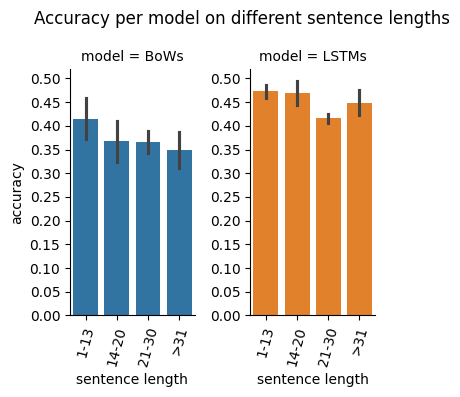

In [89]:
g = sns.catplot(
    df_sentence_len, kind="bar",
    x="length", y="accuracy", col="model",
    hue = "model",
    height=4, aspect=.5,
    errorbar="sd",
)
for axis in g.axes.flat:
    axis.tick_params(labelleft=True)
    axis.set_yticks([0.0, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50])
g.fig.suptitle("Accuracy per model on different sentence lengths")
g.set_xlabels("sentence length")
g.set_xticklabels(["1-13", "14-20", "21-30", ">31" ], rotation=75)
g._legend.remove()
g.tight_layout()

In [90]:
print(df_lstm_pbow_finetuned)

         length  accuracy  seed           model
0          0-13  0.470499     7            LSTM
1         14-20  0.466882     7            LSTM
2         21-30  0.416296     7            LSTM
3         31-50  0.427451     7            LSTM
4   all lengths  0.447964     7            LSTM
5          0-13  0.447806    21            LSTM
6         14-20  0.441034    21            LSTM
7         21-30  0.402963    21            LSTM
8         31-50  0.427451    21            LSTM
9   all lengths  0.429864    21            LSTM
10         0-13  0.476551    42            LSTM
11        14-20  0.437803    42            LSTM
12        21-30  0.411852    42            LSTM
13        31-50  0.423529    42            LSTM
14  all lengths  0.439819    42            LSTM
15         0-13  0.491679     7      pt deepbow
16        14-20  0.444265     7      pt deepbow
17        21-30  0.394074     7      pt deepbow
18        31-50  0.388235     7      pt deepbow
19  all lengths  0.436652     7      pt 

<ipython-input-91-0cbc85f57017>:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  p.set_xticklabels(["LSTM", "pt deepcbow", "LSTM Fine-tuned"], rotation=75, fontsize=12)


[Text(0, 0, 'LSTM'), Text(1, 0, 'pt deepcbow'), Text(2, 0, 'LSTM Fine-tuned')]

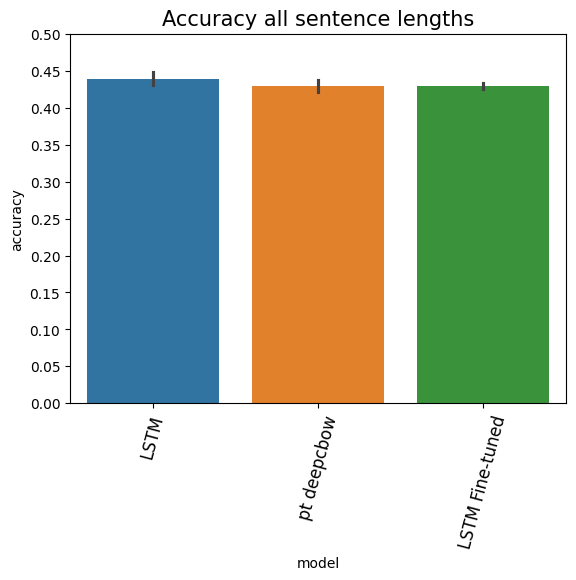

In [91]:
df_lstm_pbow_finetuned = df_lstm_pbow_finetuned[df_lstm_pbow_finetuned.length=="all lengths"]
p = sns.barplot(df_lstm_pbow_finetuned, x="model", y="accuracy", hue="model", errorbar="sd")
p.set_title("Accuracy all sentence lengths", fontsize=15)
p.set_yticks([0.0, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50])
p.set_xticklabels(["LSTM", "pt deepcbow", "LSTM Fine-tuned"], rotation=75, fontsize=12)